In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, ndcg_score, precision_recall_curve
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_fscore_support
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np
from scipy.interpolate import interp1d

In [4]:
y_ = pd.read_excel('./out/kws_dp_GCN_marked.xlsx').fillna(0)

In [5]:
y_['label_f'] = y_['label_f'].astype(bool)
y_['label_t'] = ~y_['label_f']
y_['label_t'] = y_['label_t'].astype(int)

In [6]:
y_

,Unnamed: 0,score,Unnamed: 2,label_f,repeat,label_t
0,SEMICONDUCTOR DEVICE,2655,0.0,False,0.0,1
1,MANUFACTURING METHOD,2593,0.0,True,0.0,0
2,PRODUCTION METHOD,1748,0.0,True,0.0,0
3,FUEL CELL,1597,0.0,False,0.0,1
4,RESIN COMPOSITION,1170,0.0,False,0.0,1
...,...,...,...,...,...,...
1054,NONWOVEN FABRIC,21,0.0,False,0.0,1
1055,MARTENSITIC STAINLESS STEEL,21,0.0,False,0.0,1
1056,OPTOELECTRONIC MODULE,21,0.0,False,0.0,1
1057,LASER PROCESSING METHOD,21,0.0,True,0.0,0


In [7]:
y_pred = pd.read_excel('./out/kws_dp_GCN_top1_2_pca2.xlsx')
div_num = 400

In [8]:
y_pred.loc[:div_num, 'label'] = 1
y_pred = y_pred.fillna(0)
y_pred['label'] = y_pred['label'].astype(bool)

In [9]:
y_pred

,Unnamed: 0,kw,value0,value1,label
0,0,SECONDARY BATTERY,1132,26.000441,True
1,1,ELECTRICAL DEVICE,51,2.700908,True
2,2,POLYMER BLEND,35,2.489519,True
3,3,T CELL,33,2.068599,True
4,4,SYNTHESIS METHOD,37,1.972987,True
...,...,...,...,...,...
1054,1054,EXHAUST GAS PURIFYING CATALYST,64,-1.218886,False
1055,1055,POWER TOOL,21,-1.293303,False
1056,1056,ABSORBENT ARTICLE,61,-1.318788,False
1057,1057,CONTACT LENS,22,-1.366557,False


In [10]:
y_t = pd.merge(y_pred, y_, left_on='kw', right_on='Unnamed: 0', how='left').fillna(0)

In [11]:
y_t

,Unnamed: 0_x,kw,value0,value1,label,Unnamed: 0_y,score,Unnamed: 2,label_f,repeat,label_t
0,0,SECONDARY BATTERY,1132,26.000441,True,SECONDARY BATTERY,1132,0.0,False,0.0,1
1,1,ELECTRICAL DEVICE,51,2.700908,True,ELECTRICAL DEVICE,51,0.0,False,0.0,1
2,2,POLYMER BLEND,35,2.489519,True,POLYMER BLEND,35,0.0,False,0.0,1
3,3,T CELL,33,2.068599,True,T CELL,33,0.0,False,0.0,1
4,4,SYNTHESIS METHOD,37,1.972987,True,SYNTHESIS METHOD,37,0.0,True,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1054,1054,EXHAUST GAS PURIFYING CATALYST,64,-1.218886,False,EXHAUST GAS PURIFYING CATALYST,64,0.0,False,0.0,1
1055,1055,POWER TOOL,21,-1.293303,False,POWER TOOL,21,0.0,True,0.0,0
1056,1056,ABSORBENT ARTICLE,61,-1.318788,False,ABSORBENT ARTICLE,61,0.0,True,0.0,0
1057,1057,CONTACT LENS,22,-1.366557,False,CONTACT LENS,22,0.0,False,0.0,1


In [12]:
print('precision:', precision_score(y_t['label_t'], y_t['label']))
print('recall:', recall_score( y_t['label_t'], y_t['label']))
print('f1 score:', f1_score( y_t['label_t'], y_t['label']))
print('accuracy:', accuracy_score( y_t['label_t'], y_t['label']))

precision: 0.7680798004987531
recall: 0.39086294416243655
f1 score: 0.5180824222035324
accuracy: 0.45892351274787535


In [13]:
# precision_recall_fscore_support(y_t['label_t'], y_t['value1'])

Calculate precision recall curve.


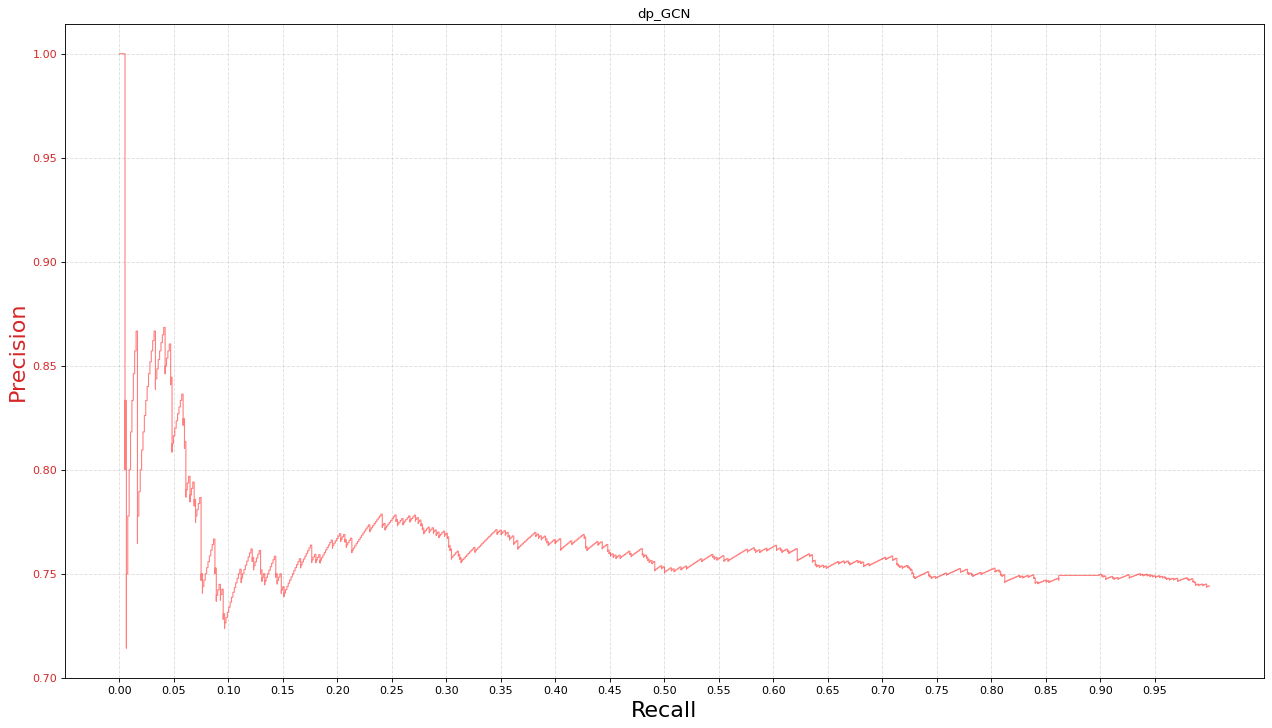

In [35]:
plot_precision_recall_curve(y_t['label_t'], y_t['value1'], 'dp_GCN')

In [55]:
y_.loc[:div_num, 'la'] = 1
y_ = y_.fillna(0)
y_['la'] = y_['la'].astype(bool)

In [56]:
y_

,Unnamed: 0,score,Unnamed: 2,label_f,repeat,label_t,la
0,SEMICONDUCTOR DEVICE,2655,0.0,False,0.0,True,True
1,MANUFACTURING METHOD,2593,0.0,True,0.0,False,True
2,PRODUCTION METHOD,1748,0.0,True,0.0,False,True
3,FUEL CELL,1597,0.0,False,0.0,True,True
4,RESIN COMPOSITION,1170,0.0,False,0.0,True,True
...,...,...,...,...,...,...,...
1054,NONWOVEN FABRIC,21,0.0,False,0.0,True,False
1055,MARTENSITIC STAINLESS STEEL,21,0.0,False,0.0,True,False
1056,OPTOELECTRONIC MODULE,21,0.0,False,0.0,True,False
1057,LASER PROCESSING METHOD,21,0.0,True,0.0,False,False


In [58]:
print('precision:', precision_score(y_['label_t'], y_['la']))
print('recall:', recall_score(y_['label_t'], y_['la']))
print('f1 score:', f1_score(y_['label_t'], y_['la']))
print('accuracy:', accuracy_score(y_['label_t'], y_['la']))

precision: 0.845771144278607
recall: 0.21573604060913706
f1 score: 0.34378159757330645
accuracy: 0.3871576959395656


In [15]:
def eval(y_file, y_pred_file, name, column_name='score', div= 400):
    y_ = pd.read_excel(y_file).fillna(0)
    y_['label_f'] = y_['label_f'].astype(bool)
    y_['label_t'] = ~y_['label_f']
    
    y_pred = pd.read_excel(y_pred_file)
    y_pred.loc[:div, 'label'] = 1
    y_pred = y_pred.fillna(0)
    y_pred['label'] = y_pred['label'].astype(bool)
    
    y_t = pd.merge(y_pred, y_, how='left')
#     print(y_t)
    
    precision = precision_score(y_t['label_t'], y_t['label'])
    recall = recall_score( y_t['label_t'], y_t['label'])
    f1 = f1_score( y_t['label_t'], y_t['label'])
    acc = accuracy_score( y_t['label_t'], y_t['label'])
    ap = average_precision_score( y_t['label_t'], y_t['label'])
                            
#     print('precision: ', precision_score(y_t['label_t'], y_t['label']))
#     print('recall:', recall_score( y_t['label_t'], y_t['label']))
#     print('f1 score:', f1_score( y_t['label_t'], y_t['label']))
#     print('accuracy:', accuracy_score( y_t['label_t'], y_t['label']))
#     print('NDCG:', ndcg_score( y_t['label_t'], y_t['label']))
#     fpr, tpr, _ = roc_curve( y_t['label_t'], y_t['label'], pos_label=True)
#     roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

#     prec, recalls, _ = precision_recall_curve(y_t['label_t'], y_t['label'],pos_label=True)
#     pr_display = PrecisionRecallDisplay(precision=prec, recall=recalls, estimator_name=name).plot()
#     pr_display.savefig()
    plot_precision_recall_curve(y_t['label_t'], y_t[column_name], name)
    return {'precision':precision, 'recall':recall, 'f1_score':f1, 'accuracy':acc, 'average_precision_score':ap}

In [19]:
metrics_list = []

Calculate precision recall curve.
Calculate precision recall curve.
Calculate precision recall curve.
Calculate precision recall curve.


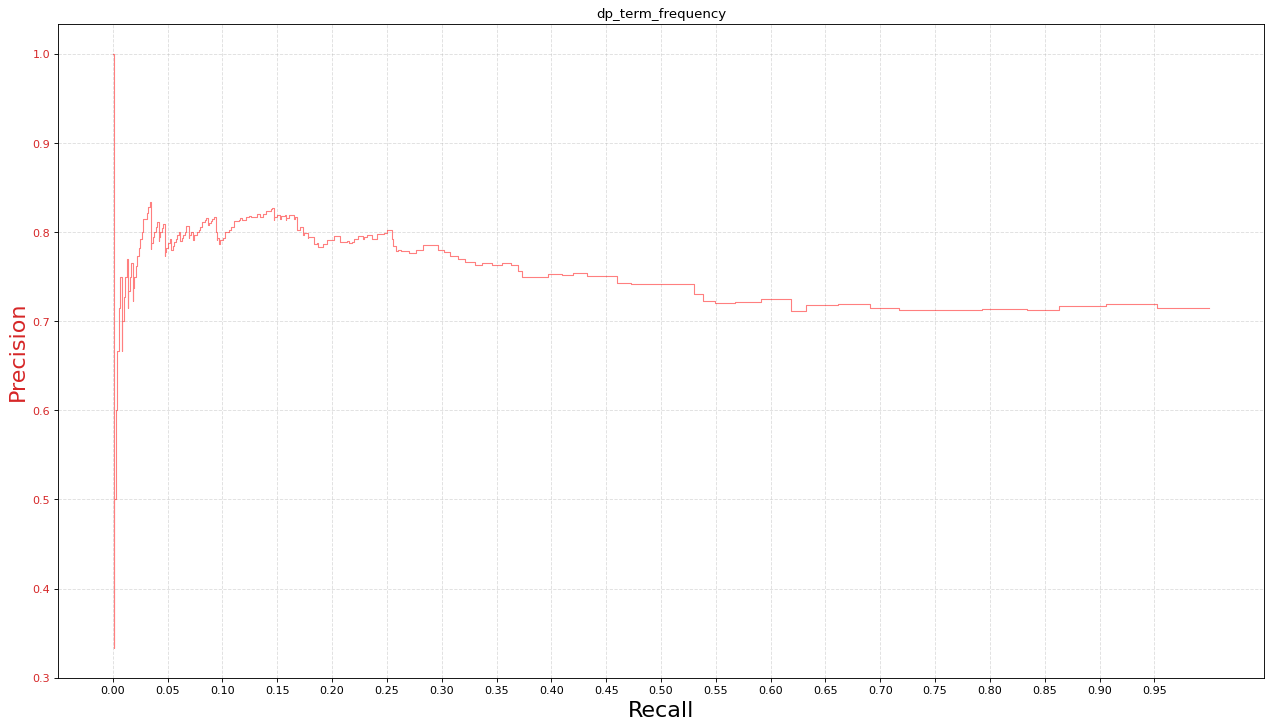

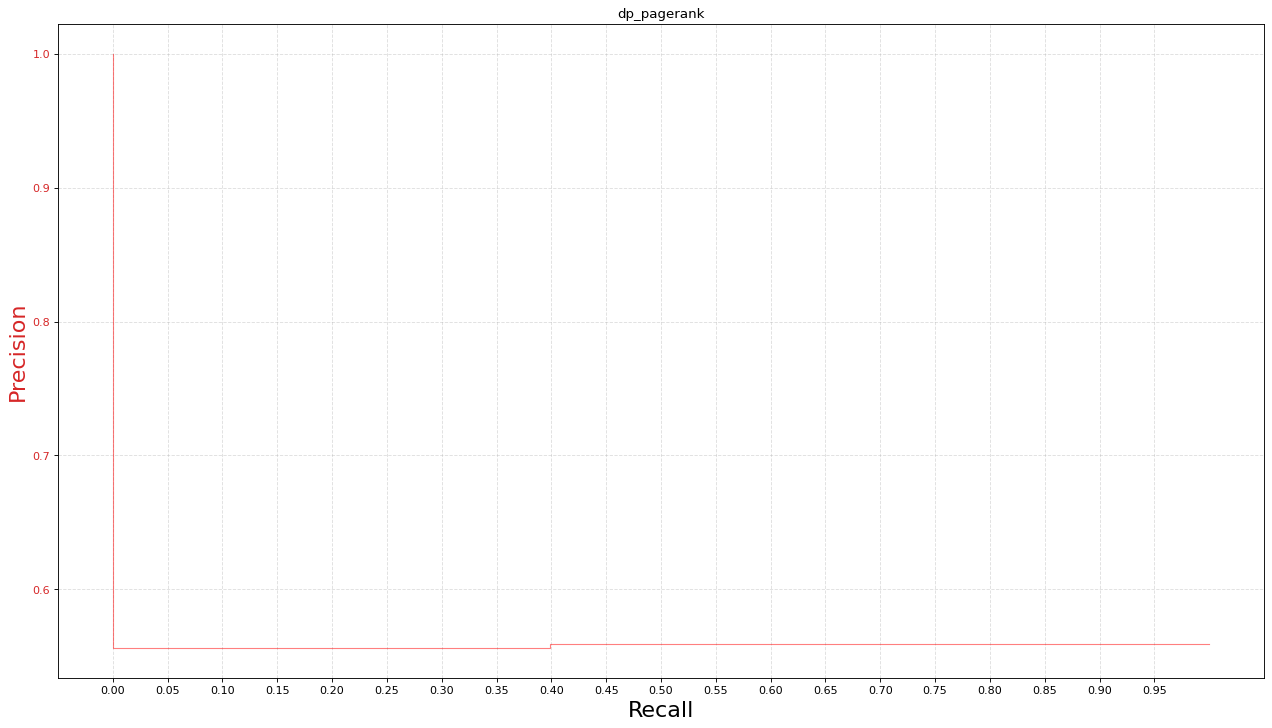

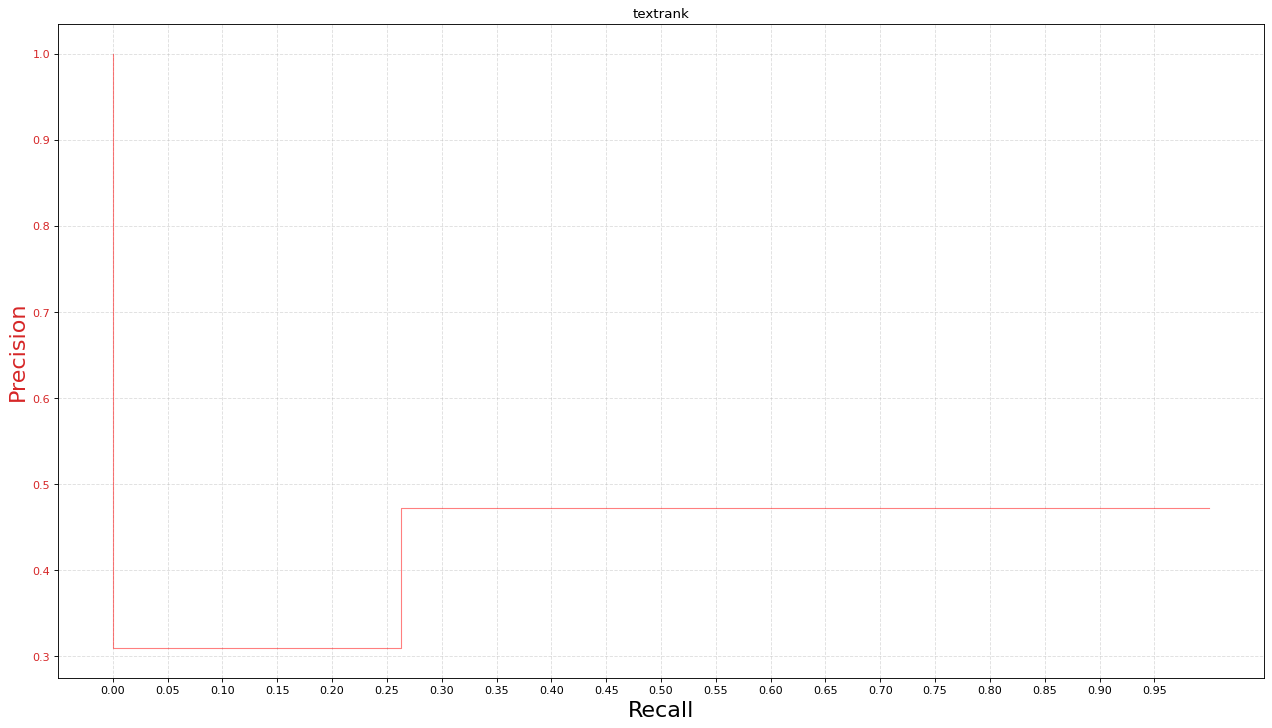

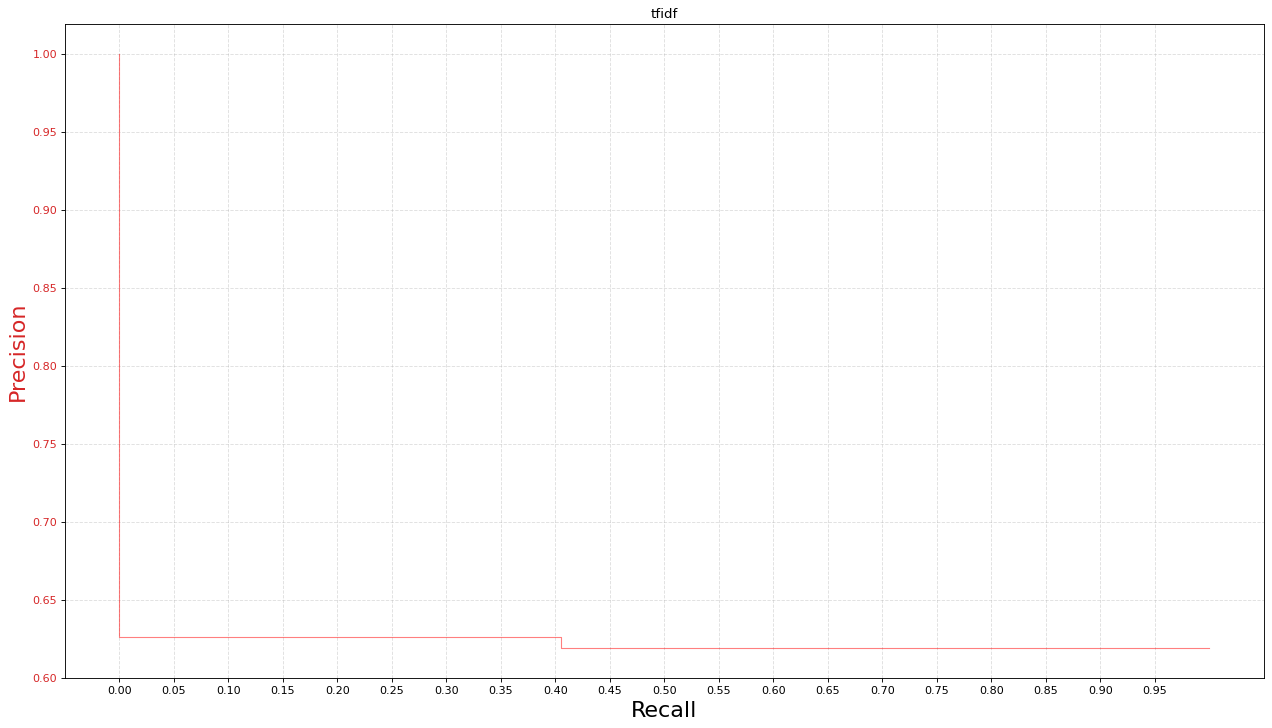

In [36]:
# metrics_list.append(eval('./out/kws_dp_GCN_marked.xlsx', './out/kws_dp_GCN.xlsx', 'dp_GCN', column_name='value1'))
metrics_list.append(eval('./out/kw_dp_term_frequency_marked.xlsx', './out/kw_dp_term_frequency.xlsx', 'dp_term_frequency',column_name='frequency'))
metrics_list.append(eval('./out/kws_dp_pagerank_marked.xlsx', './out/kws_dp_pagerank.xlsx','dp_pagerank'))
metrics_list.append(eval('./out/kws_textrank_marked.xlsx', './out/kws_textrank.xlsx', 'textrank'))
metrics_list.append(eval('./out/kws_tfidf_marked.xlsx', './out/kws_tfidf.xlsx', 'tfidf'))

In [226]:
# eval('./out/kws_dp_GCN_marked.xlsx', './out/kws_dp_GCN_top1_2_pca2.xlsx')

In [227]:
# metrics_list

In [245]:
df = pd.DataFrame(metrics_list, index=['dp_GCN', 'dp_term_frequency', 'dp_pagerank', 'textrank', 'tfidf'])

In [246]:
df

,precision,recall,f1_score,accuracy,average_precision_score
dp_GCN,0.765586,0.389594,0.516400,0.457035,0.752470
dp_term_frequency,0.750623,0.420979,0.539427,0.486000,0.729997
dp_pagerank,0.556110,0.398927,0.464583,0.486000,0.557847
textrank,0.309227,0.262712,0.284078,0.375000,0.429238
tfidf,0.625935,0.405493,0.492157,0.482000,0.621812


In [249]:
df.to_excel('./out/metrics_400.xlsx')

In [34]:
def plot_precision_recall_curve(y_true, y_predicted,name):
    """Create a PNG with the precision-recall curve for our predictions."""

    print("Calculate precision recall curve.")
    precision, recall, thresholds = precision_recall_curve(y_true, y_predicted)

#     # Save the raw precision and recall results to a pickle since we might want
#     # to analyse them later.
#     out_file = os.path.join(out_path, "precision_recall.pickle")
#     with open(out_file, "wb") as out:
#         pickle.dump({
#             "precision": precision,
#             "recall": recall,
#             "thresholds": thresholds
#         }, out)

    # Create the precision-recall curve.
#     print(precision, recall, thresholds)

#     recall = np.linspace(recall.min(), recall.max(), len(recall)) 
#     spl = make_interp_spline(recall, precision, k=3)  # type: BSpline
#     precision = spl(recall)

#     precision = interp1d(recall, precision, kind='cubic')
    
    f1 = [2*k*v/(k+v) for k,v in  zip(precision, recall)]
#     print(f1)
    
    out_file = os.path.join('', "./out/precision_recall_" +name +'.png')
    
    fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
#     ax1.bar(recall, precision)
    ax1.step(recall, precision, color='r', alpha=0.5,where='post', linewidth=1)
#     ax1.fill_between(recall, precision, step='post', alpha=0.5,color='r',  linewidth=2)
#     plt.plot(recall, precision, label="Precision-Recall curve", drawstyle="steps-post")
    ax1.set_xlabel('Recall',fontsize=20)
    ax1.set_xticks(np.linspace(0,1,20,endpoint=False), minor=False)
#     ax1.set_yticks(np.linspace(0,1,20,endpoint=False), minor=False)
    ax1.set_ylabel('Precision',color='tab:red', fontsize=20)
    ax1.grid(alpha=.4, linestyle='--')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    
#     ax2 = ax1.twinx()
#     color = 'tab:blue'
#     ax2.set_ylabel('f1 score', color=color,fontsize=20)  # we already handled the x-label with ax1
#     ax2.plot(recall, f1, color=color)
#     ax2.tick_params(axis='y', labelcolor=color)
#     ax2.set_yticks(np.linspace(0,1,20,endpoint=False), minor=False)

    
    fig.tight_layout()
    plt.title(name)
    plt.savefig(out_file)
    
    df = pd.DataFrame(zip(precision,recall), columns=['precision', 'recall'])
    df.to_excel('./tmp/pr_'+name+'.xlsx')

Calculate precision recall curve.


{'precision': 0.7655860349127181,
 'recall': 0.3895939086294416,
 'f1_score': 0.5164003364171573,
 'accuracy': 0.45703493862134087,
 'average_precision_score': 0.7524697331653012}

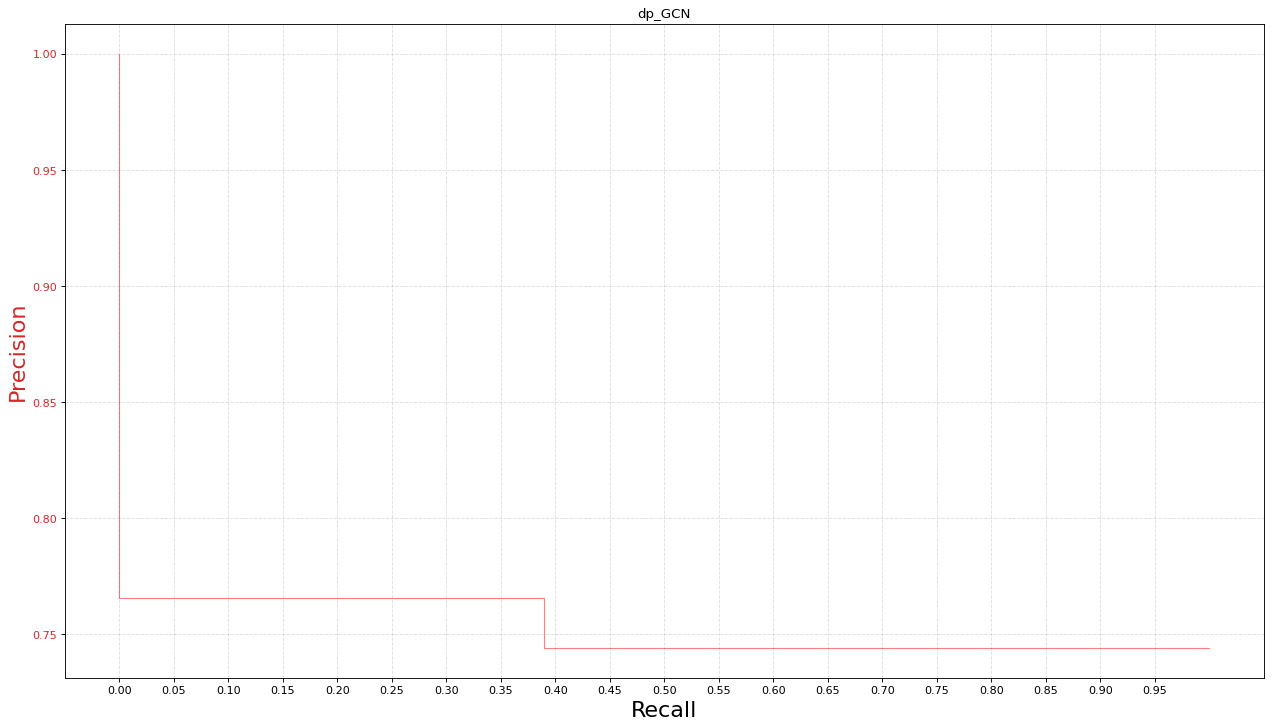

In [33]:
eval('./out/kws_dp_GCN_marked.xlsx', './out/kws_dp_GCN.xlsx', 'dp_GCN')